Exploratory Data Analysis for AQI Dataset (from Kaggle)

In [1]:
import pandas as pd
aqi_data = pd.read_csv('../dataset/data_date.csv')
print(aqi_data)

             Date                                            Country  \
0      2022-07-21                                            Albania   
1      2022-07-21                                            Algeria   
2      2022-07-21                                            Andorra   
3      2022-07-21                                             Angola   
4      2022-07-21                                          Argentina   
...           ...                                                ...   
19732  2025-06-19  United Kingdom of Great Britain and Northern I...   
19733  2025-06-19                           United States of America   
19734  2025-06-19                                         Uzbekistan   
19735  2025-06-19                                            Vatican   
19736  2025-06-19                                            Vietnam   

                               Status  AQI Value  
0                                Good         14  
1                            Mode

In [2]:
# checking for missing values
missing_vals = aqi_data.isnull()
total_missing_vals = missing_vals.sum()
print(missing_vals)
print(f"Total missing values in each column:\n {total_missing_vals}")

        Date  Country  Status  AQI Value
0      False    False   False      False
1      False    False   False      False
2      False    False   False      False
3      False    False   False      False
4      False    False   False      False
...      ...      ...     ...        ...
19732  False    False   False      False
19733  False    False   False      False
19734  False    False   False      False
19735  False    False   False      False
19736  False    False   False      False

[19737 rows x 4 columns]
Total missing values in each column:
 Date         0
Country      0
Status       0
AQI Value    0
dtype: int64


In [3]:
aqi_data.info()
aqi_data.isnull().sum()
aqi_data.duplicated().sum()
aqi_data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19737 entries, 0 to 19736
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       19737 non-null  object
 1   Country    19737 non-null  object
 2   Status     19737 non-null  object
 3   AQI Value  19737 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 616.9+ KB


,AQI Value
count,19737.00000
mean,63.32624
std,50.27994
min,1.00000
25%,29.00000
50%,53.00000
75%,83.00000
max,963.00000


In [4]:
aqi_data['Date'] = pd.to_datetime(aqi_data['Date'])
min_date = aqi_data['Date'].min()
max_date = aqi_data['Date'].max()

print(f"Start date: {min_date}")
print(f"End date: {max_date}")

Start date: 2022-07-21 00:00:00
End date: 2025-06-19 00:00:00


<Axes: title={'center': 'Global Daily Average AQI'}, xlabel='Date'>

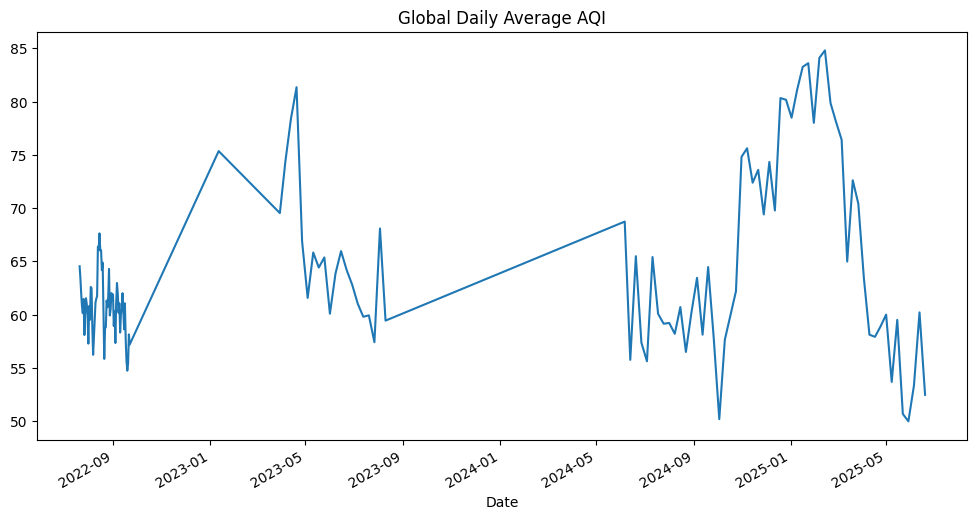

In [8]:
import matplotlib.pyplot as plt

aqi = aqi_data['AQI Value']
date = aqi_data['Date']
status = aqi_data['Status']
country = aqi_data['Country']

# time based exploration
# global daily average AQI
daily_avg = aqi_data.groupby('Date')['AQI Value'].mean()
daily_avg.plot(figsize=(12, 6), title='Global Daily Average AQI')

In [11]:
country_stats = aqi_data.groupby('Country')['AQI Value'].agg(['mean', 'min', 'max']).sort_values('mean', ascending=False)
country_stats.head(10)  # most polluted

,mean,min,max
Country,,,
India,220.449664,124,946
China,176.825503,101,963
Iraq,155.134921,23,590
Qatar,152.686869,33,183
Iran,151.121622,90,308
Bangladesh,148.710145,29,532
Uganda,132.052239,1,306
Ethiopia,131.843284,17,396
Bahrain,126.553719,55,200


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Good'),
  Text(1, 0, 'Moderate'),
  Text(2, 0, 'Unhealthy for Sensitive Groups'),
  Text(3, 0, 'Unhealthy'),
  Text(4, 0, 'Very Unhealthy'),
  Text(5, 0, 'Hazardous')])

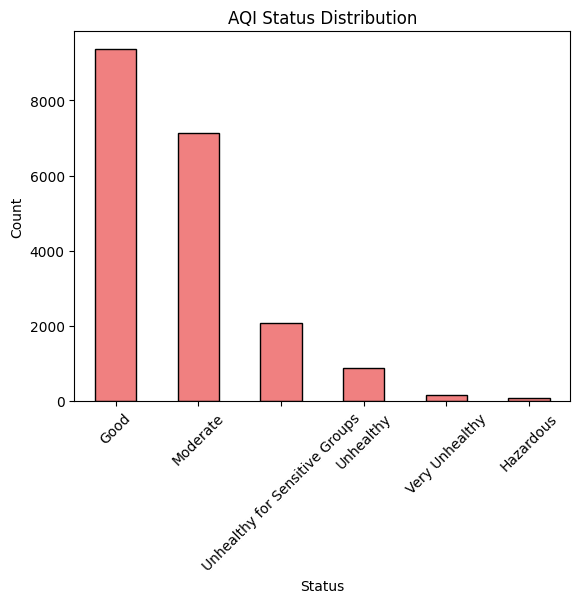

In [12]:
aqi_data['Status'].value_counts().plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('AQI Status Distribution')
plt.ylabel('Count')
plt.xticks(rotation=45)


<Axes: title={'center': 'Avg AQI by Month'}, xlabel='Month'>

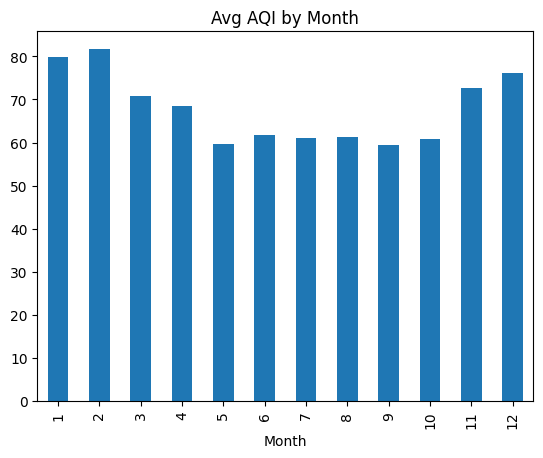

In [14]:
aqi_data['Month'] = aqi_data['Date'].dt.month
aqi_data['DayOfWeek'] = aqi_data['Date'].dt.day_name()
month = aqi_data['Month']
dow = aqi_data['DayOfWeek']

aqi_data.groupby('Month')['AQI Value'].mean().plot(kind='bar', title='Avg AQI by Month')


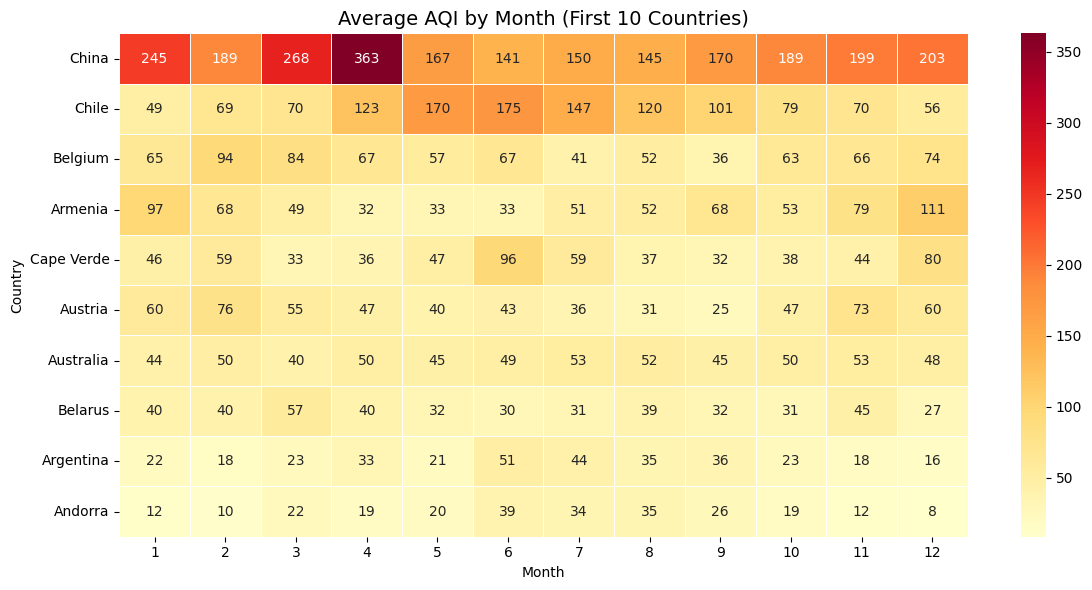

In [18]:
# heatmap average AQI by month and country
import seaborn as sns
first_10_countries = country.value_counts().nlargest(10).index

first_10_countries_data = aqi_data[country.isin(first_10_countries)]
# Group by Country & Month → average AQI
pivot = first_10_countries_data.groupby(['Country', 'Month'])['AQI Value'].mean().unstack()

# Sort by average AQI across all months
pivot = pivot.loc[pivot.mean(axis=1).sort_values(ascending=False).index]


# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap='YlOrRd', linewidths=0.5)
plt.title('Average AQI by Month (First 10 Countries)', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Country')
plt.tight_layout()
plt.show()